# WHO - Life Expectancy
https://www.kaggle.com/kumarajarshi/life-expectancy-who

DEFINITIONS
<li> <b>Adult mortaility rate:</b>
The adult mortality rate refers to the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons) </li>
<li> <b> Infant mortality rate:</b>
    Infant mortality is the death of young children under the age of 1. This death toll is measured by the infant mortality rate (IMR), which is the probability of deaths of children under one year of age per 1000 live births.</li>
<li> <b>Hepatitis B:</b>
    Hepatitis B is a viral infection that attacks the liver and can cause both acute and chronic disease.</li>
<li> <b>Measles :</b>
    Measles is a highly contagious illness caused by a virus that replicates in the nose and throat of an infected child or adult.</li>
<li><b>BMI:</b>
Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.</li>
<li> <b>Diphtheria: </b> Diphtheria (dif-THEER-e-uh) is a serious bacterial infection that usually affects the mucous membranes of your nose and throat. </li>
<li><b> Polio:</b> Polio, or poliomyelitis, is a disabling and life-threatening disease caused by the poliovirus. The virus spreads from person to person and can infect a person's spinal cord, causing paralysis (can't move parts of the body).<\li>

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import pickle

# Model building
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import pearsonr, spearmanr

# %matplotlib inline

### Hypothesis 
<br>
<li>Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?</li>
<li>Should a country having a lower life expectancy value(less than 65) increase its healthcare expenditure in order to improve its average lifespan?</li>
<li>How does Infant and Adult mortality rates affect life expectancy?</li>
<li>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.</li>
<li>What is the impact of schooling on the lifespan of humans?</li>
<li>Does Life Expectancy have positive or negative relationship with drinking alcohol?</li>
<li>Do densely populated countries tend to have lower life expectancy?</li>
<li>What is the impact of Immunization coverage on life Expectancy?</li>

In [30]:
df = pd.read_csv('./data/Life Expectancy Data.csv')

# Get numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
tar_col = 'Life expectancy'

# Remove empty spaces in leading and trail
col_names = [col_name.strip() for col_name in df.columns]
df.columns = col_names

### Data pre-processing

Each country should have records from 2000 - 2015 (16 observations) and will eliminate countries that are having very less observations

In [31]:
# Get each country's number of records
df = df.join(df.groupby(['Country']).agg({'Year': 'count'}), 
             on='Country', 
             rsuffix='_count')

# If the countries are having less than 16 observations eliminate it
df = df[~(df['Year_count'] < 16)]

# Drop temp column
# df.drop(['Year_count'], axis=1, inplace=True)

In [32]:
# Get each country's number of records
df[~(df['Year_count'] < 16)].isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
Year_count                           0
dtype: int64

In [33]:
df.to_csv('./data/Processed.csv', index=False)

### Missing value treatment

<li> Drop "population" column as 41/183 countries are having null values </li>
<li> Drop 'Hepatitis B' column as atleast 9/183 countries are completely not having values or experiment it to improve accuracy </li>
<li> Drop 'GDP' column as atleast 24/183 countries are completely not having values and also it is having strong co-relation with percentage of expenditure</li>

In [17]:
df.drop(['Population', 'Hepatitis B', 'GDP'], axis=1, inplace=True)
df.dropna(inplace=True)

In [18]:
(df.isnull().sum().sort_values()/df.shape[0]) * 100

Country                            0.0
thinness 5-9 years                 0.0
thinness  1-19 years               0.0
HIV/AIDS                           0.0
Diphtheria                         0.0
Total expenditure                  0.0
Polio                              0.0
under-five deaths                  0.0
Income composition of resources    0.0
BMI                                0.0
percentage expenditure             0.0
Alcohol                            0.0
infant deaths                      0.0
Adult Mortality                    0.0
Life expectancy                    0.0
Status                             0.0
Year                               0.0
Measles                            0.0
Schooling                          0.0
dtype: float64

In [156]:
# Outlier removal
Q1 = df['Adult Mortality'].quantile(0.25)
Q3 = df['Adult Mortality'].quantile(0.75)
IQR = Q3 - Q1

# data = df.loc[~((df['Adult Mortality'] < (Q1 - 1.5 * IQR)) |(df['Adult Mortality'] > (Q3 + 1.5 * IQR))), 'Adult Mortality']

## Infant mortality rate vs Life expectancy

<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>

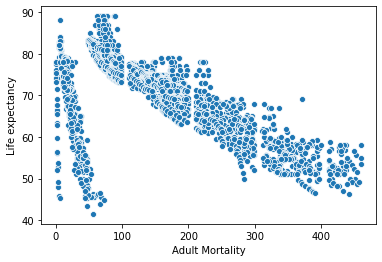

In [155]:
sns.scatterplot(data, 'Life expectancy', data=df)

<b> Correlation co-efficients </b>

In [175]:
# Covariance
print(np.cov(df['Adult Mortality'], df['Life expectancy']))

# Pearson correlation coefficient
print(' Pearson correlation coefficient n', pearsonr(df['Adult Mortality'], df['Life expectancy']))

# Spearman correlation coefficient
print(spearmanr(df['Adult Mortality'], df['Life expectancy']))

[[15448.52090299  -824.30927254]
 [ -824.30927254    90.70405193]]
 Pearson correlation coefficient n (-0.696359313769976, 0.0)
SpearmanrResult(correlation=-0.6500069678928209, pvalue=0.0)


<b> Linear Regression </b>

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2755.
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:19:16   Log-Likelihood:                -9782.0
No. Observations:                2928   AIC:                         1.957e+04
Df Residuals:                    2926   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              78.0182      0.210    3

c:\users\amuthk\documents\softwares\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


<AxesSubplot:>

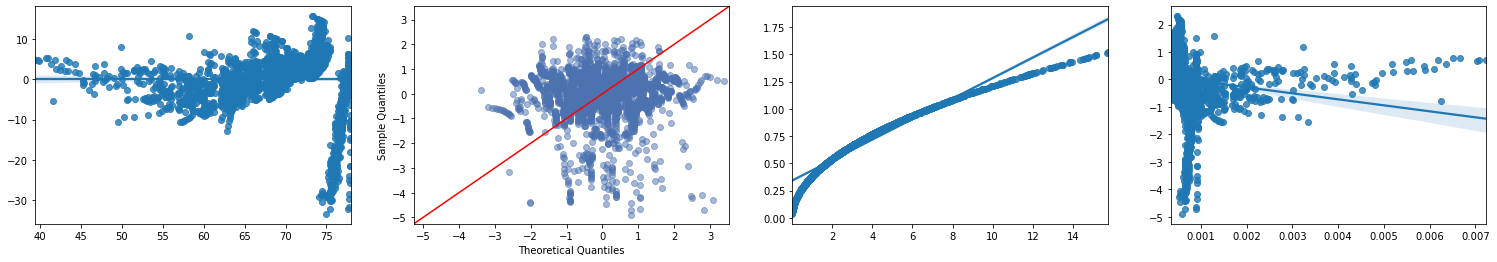

In [184]:
# Input and output
X = df['Adult Mortality']
y = df['Life expectancy']

X1 = sm.add_constant(X)
ols_model = sm.OLS(y, X1)
ols = ols_model.fit()
ols.summary()

print(ols.summary())

# PLots
fig, ax = plt.subplots(1, 4, figsize=(26, 4))

"""
Residual vs Fitted Values
"""
sns.regplot(ols.fittedvalues, ols.resid, ax=ax[0]) 

"""
Q-Q Plot
"""
# Standardise the residuals
ss = StandardScaler()
standarised_residual = ss.fit_transform(np.array(ols.resid).reshape(-1,1))
# Quantile plot
QQ = ProbPlot(standarised_residual)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax[1])

"""
Scale Location Plot
"""
sns.regplot(ols.resid, np.sqrt(standarised_residual), ax=ax[2])

"""
Residuals vs Leverage Plot
"""
model_leverage = ols.get_influence().hat_matrix_diag
sns.regplot(model_leverage, standarised_residual, ax=ax[3])

## Infant mortality rate vs Life expectancy

<b>Correlation co-efficients<b>

In [180]:
# Covariance
print(np.cov(df['infant deaths'], df['Life expectancy']))

# Pearson correlation coefficient
print(' Pearson correlation coefficient n', pearsonr(df['infant deaths'], df['Life expectancy']))

# Spearman correlation coefficient
print(spearmanr(df['infant deaths'], df['Life expectancy']))

[[13951.02320386  -221.10841938]
 [ -221.10841938    90.70405193]]
 Pearson correlation coefficient n (-0.1965571766552618, 6.877600360862422e-27)
SpearmanrResult(correlation=-0.6007274775743725, pvalue=9.190701987184539e-287)


<b>Linear Regression <b>

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     743.9
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          3.92e-146
Time:                        18:19:30   Log-Likelihood:                -10422.
No. Observations:                2928   AIC:                         2.085e+04
Df Residuals:                    2926   BIC:                         2.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            72.2732      0.193    374.722

c:\users\amuthk\documents\softwares\python\python37\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


<AxesSubplot:>

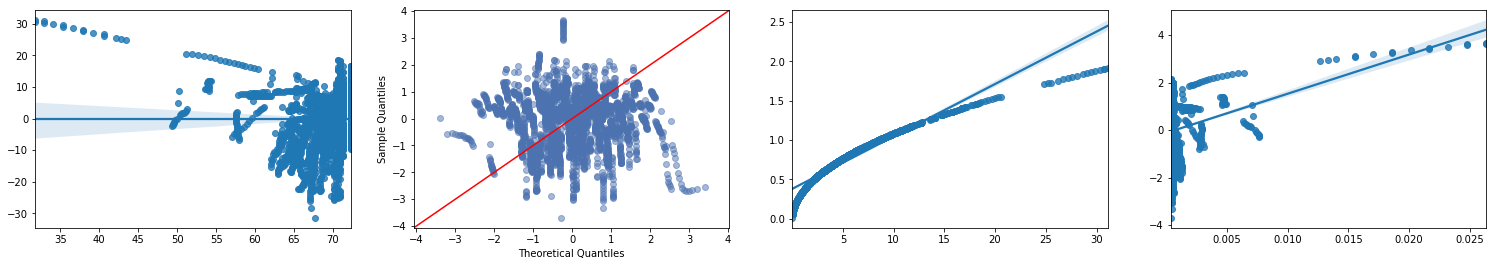

In [185]:
# Input and output
X = np.sqrt(df['infant deaths'])
y = df['Life expectancy']

X1 = sm.add_constant(X)
ols_model = sm.OLS(y, X1)
ols = ols_model.fit()
print(ols.summary())

# PLots
fig, ax = plt.subplots(1, 4, figsize=(26, 4))

"""
Residual vs Fitted Values
"""
sns.regplot(ols.fittedvalues, ols.resid, ax=ax[0]) 

"""
Q-Q Plot
"""
# Standardise the residuals
ss = StandardScaler()
standarised_residual = ss.fit_transform(np.array(ols.resid).reshape(-1,1))
# Quantile plot
QQ = ProbPlot(standarised_residual)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax[1])

"""
Scale Location Plot
"""
sns.regplot(ols.resid, np.sqrt(standarised_residual), ax=ax[2])

"""
Residuals vs Leverage Plot
"""
model_leverage = ols.get_influence().hat_matrix_diag
sns.regplot(model_leverage, standarised_residual, ax=ax[3])